In [37]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import glob

In [7]:
 aggr_files = []
 normal_files = []
 for i in range(1,5):   
    path_aggr = r'C:/Users/johan/ML1/ML1_Repo/Sheet2/EMG Physical Action Data Set/sub'+str(i)+'/Aggressive/txt'                    
    aggr_files.extend(glob.glob(os.path.join(path_aggr, "*.txt")))
    path_normal = r'C:/Users/johan/ML1/ML1_Repo/Sheet2/EMG Physical Action Data Set/sub'+str(i)+'/Normal/txt'   
    normal_files.extend(glob.glob(os.path.join(path_normal, "*.txt")))

df_from_each_aggr_file = (pd.read_table(f, names=list(range(8))) for f in aggr_files)
aggr_df = pd.concat(df_from_each_aggr_file, ignore_index=True)

df_from_each_normal_file = (pd.read_table(f, names=list(range(8))) for f in normal_files)
normal_df = pd.concat(df_from_each_normal_file, ignore_index=True)

aggr_df.insert(8, 'label', 0)
normal_df.insert(8, 'label', 1)

data_df = pd.concat([aggr_df,normal_df], ignore_index=True)
data_df = data_df.dropna()

In [25]:
data_train_df, data_test_df = train_test_split(data_df, test_size=0.01, train_size=0.04)

In [26]:
feature_list = list(range(8))
svm_lin = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_lin.fit(data_train_df[feature_list], data_train_df['label'])
svm_lin.score(data_test_df[feature_list], data_test_df['label'])

0.5018181818181818

In [39]:
feature_list = list(range(8))
svm_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
svm_rbf.fit(data_train_df[feature_list], data_train_df['label'])


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [40]:
predict_test_df = svm_rbf.predict(data_test_df[feature_list])
confusion_matrix(data_test_df['label'], predict_test_df)


array([[3081,  921],
       [ 826, 3147]], dtype=int64)

In [42]:
accuracy = svm_rbf.score(data_test_df[feature_list], data_test_df['label'])
print(accuracy)

tn, fp, fn, tp = confusion_matrix(data_test_df['label'], predict_test_df).ravel()
sensitivity = tn/(tn + fp)
print(sensitivity)

specificity = tp/(tp + fn)
print(specificity)

0.7809404388714734
0.7698650674662668
0.7920966524037252


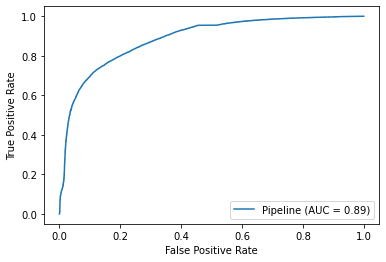

In [44]:
metrics.plot_roc_curve(svm_rbf, data_train_df[feature_list], data_train_df['label'])